In [ ]:
SELECT
    /* Создал уникальный идентификатор для каждого периода, 
    чтобы в дальнейшем period_id по всей колонке был уникальным */
    (@row_number := @row_number + 1) AS period_id,

    -- Взял номер месяца из начальной даты
    MONTH(start_date) AS month_id,
    
    -- Изменил формат периодов по примеру для колонки period_name
    CONCAT(DATE_FORMAT(start_date, '%d.%m'), ' - ', DATE_FORMAT(end_date, '%d.%m')) AS period_name,
    
    -- Количество дней в периоде
    DATEDIFF(end_date, start_date) + 1 AS days_in_period,
    
    -- Выбор начальной и конечной даты из подзапроса
    start_date AS start_date,
    end_date AS end_date,
    
    -- Определение номера периода внутри месяца
    CASE
        WHEN DAYOFMONTH(start_date) BETWEEN 1 AND 7 THEN 1
        WHEN DAYOFMONTH(start_date) BETWEEN 8 AND 14 THEN 2
        WHEN DAYOFMONTH(start_date) BETWEEN 15 AND 21 THEN 3
        WHEN DAYOFMONTH(start_date) BETWEEN 22 AND 28 THEN 4
        ELSE 5
    END AS period_number_within_month
FROM (
    -- Генерация начальной и конечной даты для каждого периода
    SELECT 
        -- Начальная дата периода
        DATE_ADD(DATE_ADD('2021-01-01', INTERVAL m.a MONTH), INTERVAL (7 * d.a) DAY) AS start_date,
        
        /* Если конечная дата выходит за пределы месяца, 
        то в качестве конечной даты используется последний день месяца */
        CASE
            WHEN DATE_ADD(DATE_ADD(DATE_ADD('2021-01-01', INTERVAL m.a MONTH), INTERVAL (7 * d.a) DAY), INTERVAL 6 DAY) 
				 > LAST_DAY(DATE_ADD(DATE_ADD('2021-01-01', INTERVAL m.a MONTH), INTERVAL (7 * d.a) DAY)) 
			THEN LAST_DAY(DATE_ADD(DATE_ADD('2021-01-01', INTERVAL m.a MONTH), INTERVAL (7 * d.a) DAY))
            ELSE DATE_ADD(DATE_ADD(DATE_ADD('2021-01-01', INTERVAL m.a MONTH), INTERVAL (7 * d.a) DAY), INTERVAL 6 DAY)
        END AS end_date
    FROM 
        -- Генерация чисел от 0 до 4, чтобы учитывать максимум 5 периодов в месяце
        (SELECT 0 AS a UNION ALL SELECT 1 UNION ALL SELECT 2 UNION ALL SELECT 3 UNION ALL SELECT 4) AS d
        CROSS JOIN (SELECT 0 AS a UNION ALL 
					SELECT 1 UNION ALL 
                    SELECT 2 UNION ALL 
                    SELECT 3 UNION ALL 
                    SELECT 4 UNION ALL 
                    SELECT 5 UNION ALL 
                    SELECT 6 UNION ALL 
                    SELECT 7 UNION ALL 
                    SELECT 8 UNION ALL 
                    SELECT 9 UNION ALL 
                    SELECT 10 UNION ALL 
                    SELECT 11) AS m
) AS date_range

JOIN (SELECT @row_number := 0) AS temp
WHERE start_date BETWEEN '2021-01-01' AND '2025-12-31'
ORDER BY start_date;

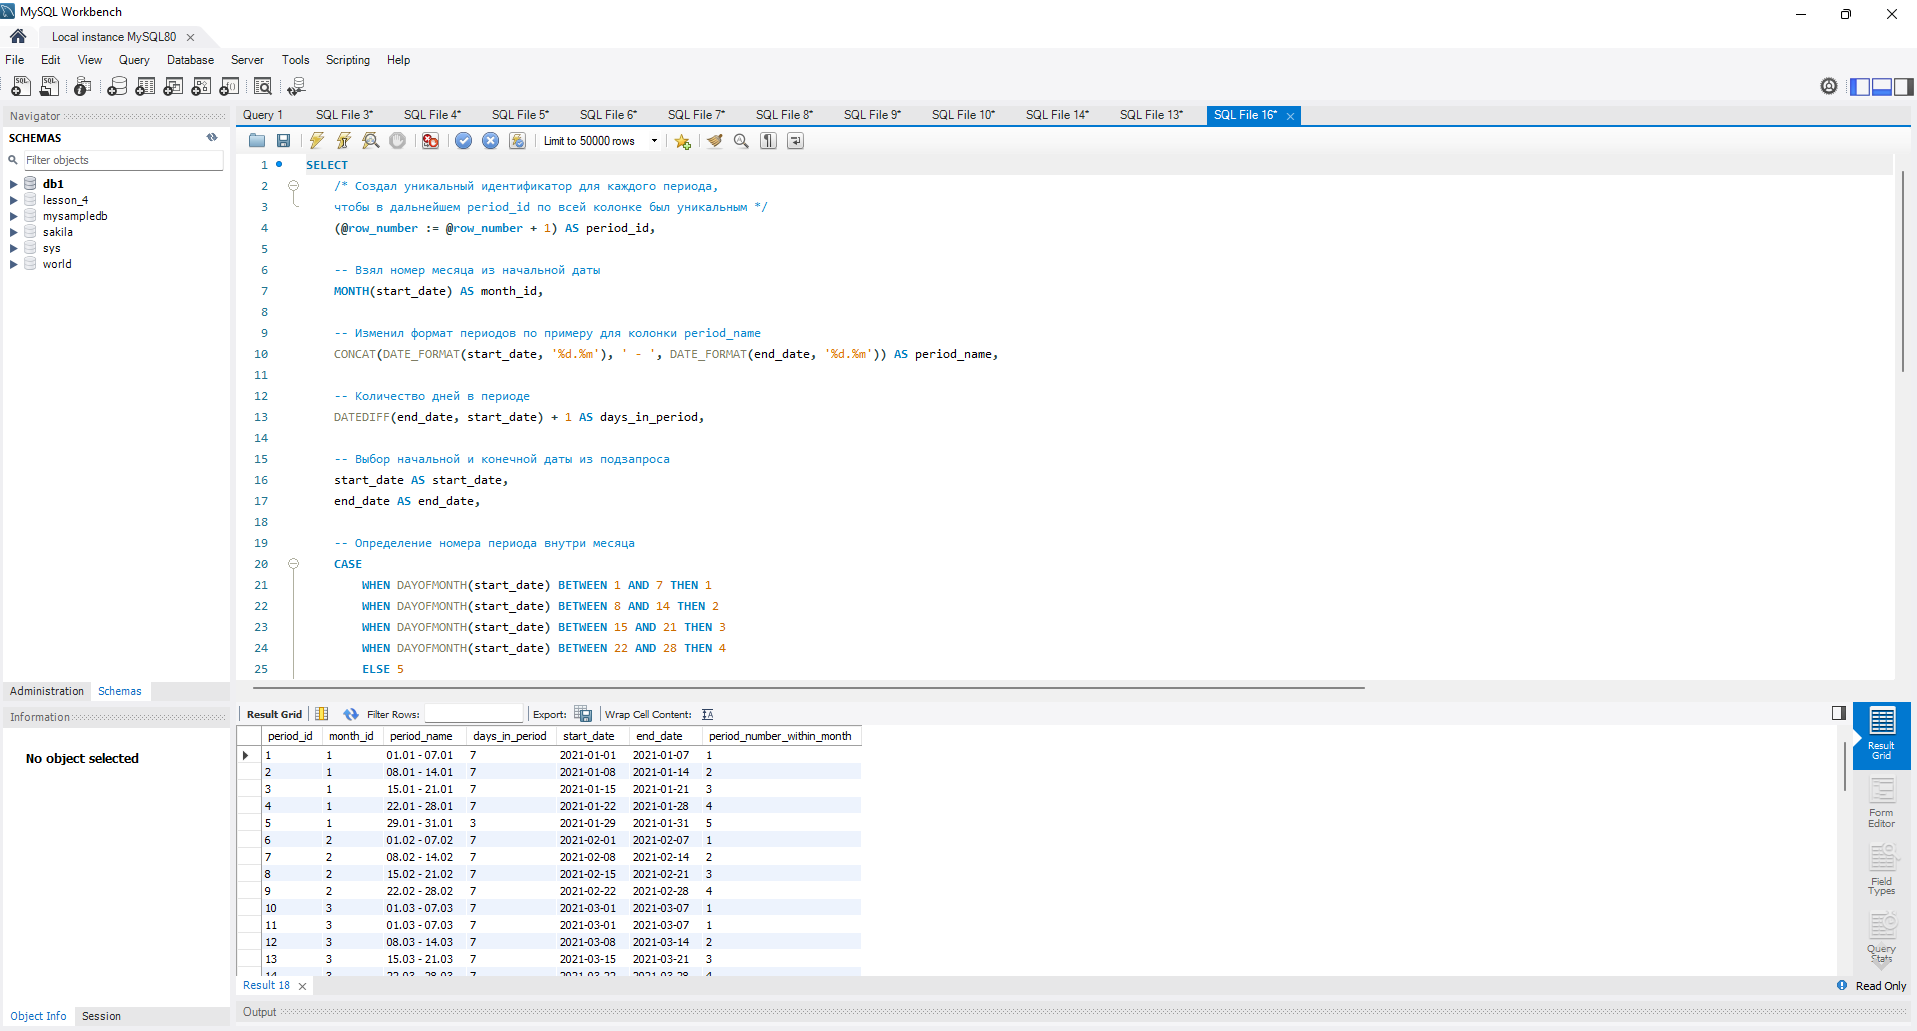